In [66]:
from pathlib import Path
import pandas as pd
import numpy as np

In [67]:
processed = Path('../../data/processed')
selection_data = pd.read_pickle(Path(processed) / 'selection_data.pkl')

In [68]:
selection_data.ChooseTeam.value_counts()

False    22019
True     11470
Name: ChooseTeam, dtype: int64

In [69]:
selection_data = selection_data[selection_data.year >= 2000]
# selection_data = selection_data[(selection_data.year < 2000) & (selection_data.year >= 1960)]

In [70]:
selection_data.b_PA_in_G.value_counts().sort_index()

1      24
2      41
3     175
4    2985
5    3574
6     484
7      45
8       8
9       2
Name: b_PA_in_G, dtype: Int64

In [71]:
selection_data[['spot', 'home']].value_counts()

spot  home
1.0   0.0     2246
      1.0     1622
2.0   0.0     1043
3.0   0.0      846
2.0   1.0      668
3.0   1.0      540
4.0   0.0      186
      1.0      102
5.0   0.0       46
      1.0       23
6.0   0.0       11
7.0   0.0        4
6.0   1.0        1
dtype: int64

In [72]:
def adjust_plot(plt):
    plt.xaxis.grid(False)
    plt.yaxis.grid(True, linestyle='dashed', color='lightgrey')
    plt.set_axisbelow(True)
    plt.xaxis.set_ticks_position('none') 
    plt.yaxis.set_ticks_position('none') 

    plt.spines['right'].set_visible(False)
    plt.spines['top'].set_visible(False)

In [73]:
Wins = selection_data.loc[selection_data['Win'] == True, 'Win'].count()
Loses = selection_data.loc[selection_data['Win'] == False, 'Win'].count()
WinRate = round( (Wins / (Wins + Loses)) *100, 1)
print('Win pick rate: ' + str(WinRate) + '%')

Win pick rate: 76.4%


In [74]:
day_wins = selection_data.groupby('date')['Win'].prod()
print('Win both picks rate: ' + str(round(day_wins.mean()*100, 1)) + '%')

Win both picks rate: 58.1%


In [53]:
def streak_counter(df):
    df['L_Win'] = df['Win'].shift(1)
    df['L_year'] = df['year'].shift(1)
    df['start_of_streak'] = (df['Win'] != df['L_Win']) | (df['year'] != df['L_year'])
    df['streak_id'] = df['start_of_streak'].cumsum()
    df['streak_counter'] = df.groupby('streak_id').cumcount() + 1
    df.loc[df.Win == 0, 'streak_counter'] = 0
    
    return df

In [54]:
selection_data = selection_data.astype({'Win':'int8'})
selection_data = streak_counter(selection_data)
streaks = selection_data.groupby('streak_id').agg({'streak_counter':'max'})
streaks['streak_counter'].max()

31

In [55]:
year_results = selection_data.groupby('year').agg({'Win':'mean', 'streak_counter':'max'})
year_results

,Win,streak_counter
year,,
2000.0,0.768156,25
2001.0,0.775000,31
2002.0,0.808333,19
2003.0,0.750000,22
2004.0,0.747222,22
2005.0,0.780556,17
2006.0,0.752778,17
2007.0,0.787293,22
2008.0,0.765193,16


In [56]:
selection_data['EstProb'].describe()

count    7338.000000
mean        0.782287
std         0.026800
min         0.693127
25%         0.762989
50%         0.780313
75%         0.793304
max         0.955244
Name: EstProb, dtype: float64

<AxesSubplot:xlabel='EstProb', ylabel='Win'>

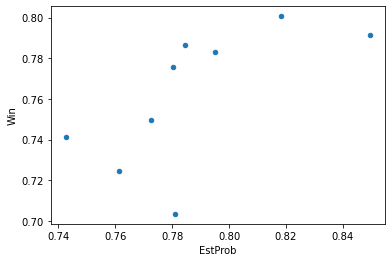

In [57]:
selection_data['bin'] = pd.qcut(selection_data['EstProb'], 10, duplicates='drop')

dots = selection_data.groupby(['bin'])[['EstProb', 'Win']].agg('mean')
dots = dots.reset_index()
dots.plot.scatter('EstProb','Win')

In [58]:
selection_data[['EstProb', 'Win']].mean()

EstProb    0.782287
Win        0.764241
dtype: float64

In [59]:
# Start including data from current season

# Relief pitchers data

# Set up S3 if necessary for size, or for GPUs

# Check # training observations for each model fit 
# and make sure we aren't losing any

# Ensemble methods for NN and logistic

# Rest days

# Adjust Pitcher and Batter stats for park record ( merge it in and divide) - compare adjusted at home and away stats

# New pitcher flag?

# Find out where they are in the rotation

# Fix training so that it doesn't need to specify number of variables

# Split up grid search vs. non-grid search training

# Why is Win missing? Check merge loss

# Time-series CV

# Come up with potential guesses remaining counter (get schedule from retrosheet)

# Predict closer from roster and then use their rgs to construct estimated closing rgs (or just rgs for closing team)

# predicting game length

# Calculate streaks by aggregating predictions by day and not counting if any pick loses.

# add league dummy to model

# Average multiple prediction methods

# Come up with pitcher vs. Batter metrics

# check out distribution of PAs for selections. See if we can find a way to cut off the left tail.

# Park Factors by handedness

# Park Factors by hitter distribution (L vs. R, 1 v 2 v 3 v HR)

# Come up with Batter vs. Pitcher Stats and graph distribution to see tails.

# Add temperature and froce of win from or to

In [60]:
restricted = selection_data.loc[
#     (selection_data['EstProb'] >= .74) &
#     (selection_data['park_factor'] >= 1) &
    (selection_data['spot'] <= 4),
    ['Win', 'year']
]

In [61]:
restricted= restricted.astype({'Win':'int8'})
restricted = streak_counter(restricted)
streaks = restricted.groupby('streak_id').agg({'streak_counter':'max'})
streaks['streak_counter'].max()

31

In [62]:
Wins = restricted.loc[
    (restricted['Win'] == True),
    'Win'].count()
Loses = restricted.loc[
    (restricted['Win'] == False),
    'Win'].count()
WinRate = round( (Wins / (Wins + Loses)) *100, 1)
print(str(WinRate) + '%')

76.5%


In [63]:
year_results = restricted.groupby('year').agg({'Win':'mean', 'streak_counter':'max'})
year_results

,Win,streak_counter
year,,
2000.0,0.764873,25
2001.0,0.774929,31
2002.0,0.809524,19
2003.0,0.753501,21
2004.0,0.756374,22
2005.0,0.778090,17
2006.0,0.750000,17
2007.0,0.788732,22
2008.0,0.763380,17


In [64]:
year_results['streak_counter'].sum()

404

In [65]:
selection_data = selection_data.sort_values(['year', 'Date'])

KeyError: 'Date'

In [23]:
selection_data['pick_day'] = selection_data.groupby(['year']).cumcount() + 1
selection_data['pick_day'] = np.ceil(selection_data['pick_day'] / 2)

In [24]:
year_results.sort_values(['Win'], ascending=[False])

,Win,streak_counter
year,,
2002.0,0.837535,19
2007.0,0.795455,15
2015.0,0.793785,18
2008.0,0.789773,16
2005.0,0.788732,17
2009.0,0.784314,22
2004.0,0.783476,24
2019.0,0.783099,17
2013.0,0.781870,20
